In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline

In [2]:
red_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

df = pd.concat([red_wine, white_wine], ignore_index=True)

print(f"Red wine samples: {len(red_wine)}")
print(f"White wine samples: {len(white_wine)}")
print(f"Total samples: {len(df)}")

Red wine samples: 1599
White wine samples: 4898
Total samples: 6497


In [3]:
print("Dataset Shape:", df.shape)
display(df.head())

print("\nDataset Info:")
df.info()

print("\nBasic Statistics:")
display(df.describe())

print("\nWine Type Distribution:")
print(df['wine_type'].value_counts())

print("\nQuality Score Distribution by Wine Type:")
quality_by_type = pd.crosstab(df['wine_type'], df['quality'])
display(quality_by_type)

Dataset Shape: (6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB

Basic Statistics:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000



Wine Type Distribution:
wine_type
white    4898
red      1599
Name: count, dtype: int64

Quality Score Distribution by Wine Type:


quality,3,4,5,6,7,8,9
wine_type,,,,,,,
red,10,53,681,638,199,18,0
white,20,163,1457,2198,880,175,5


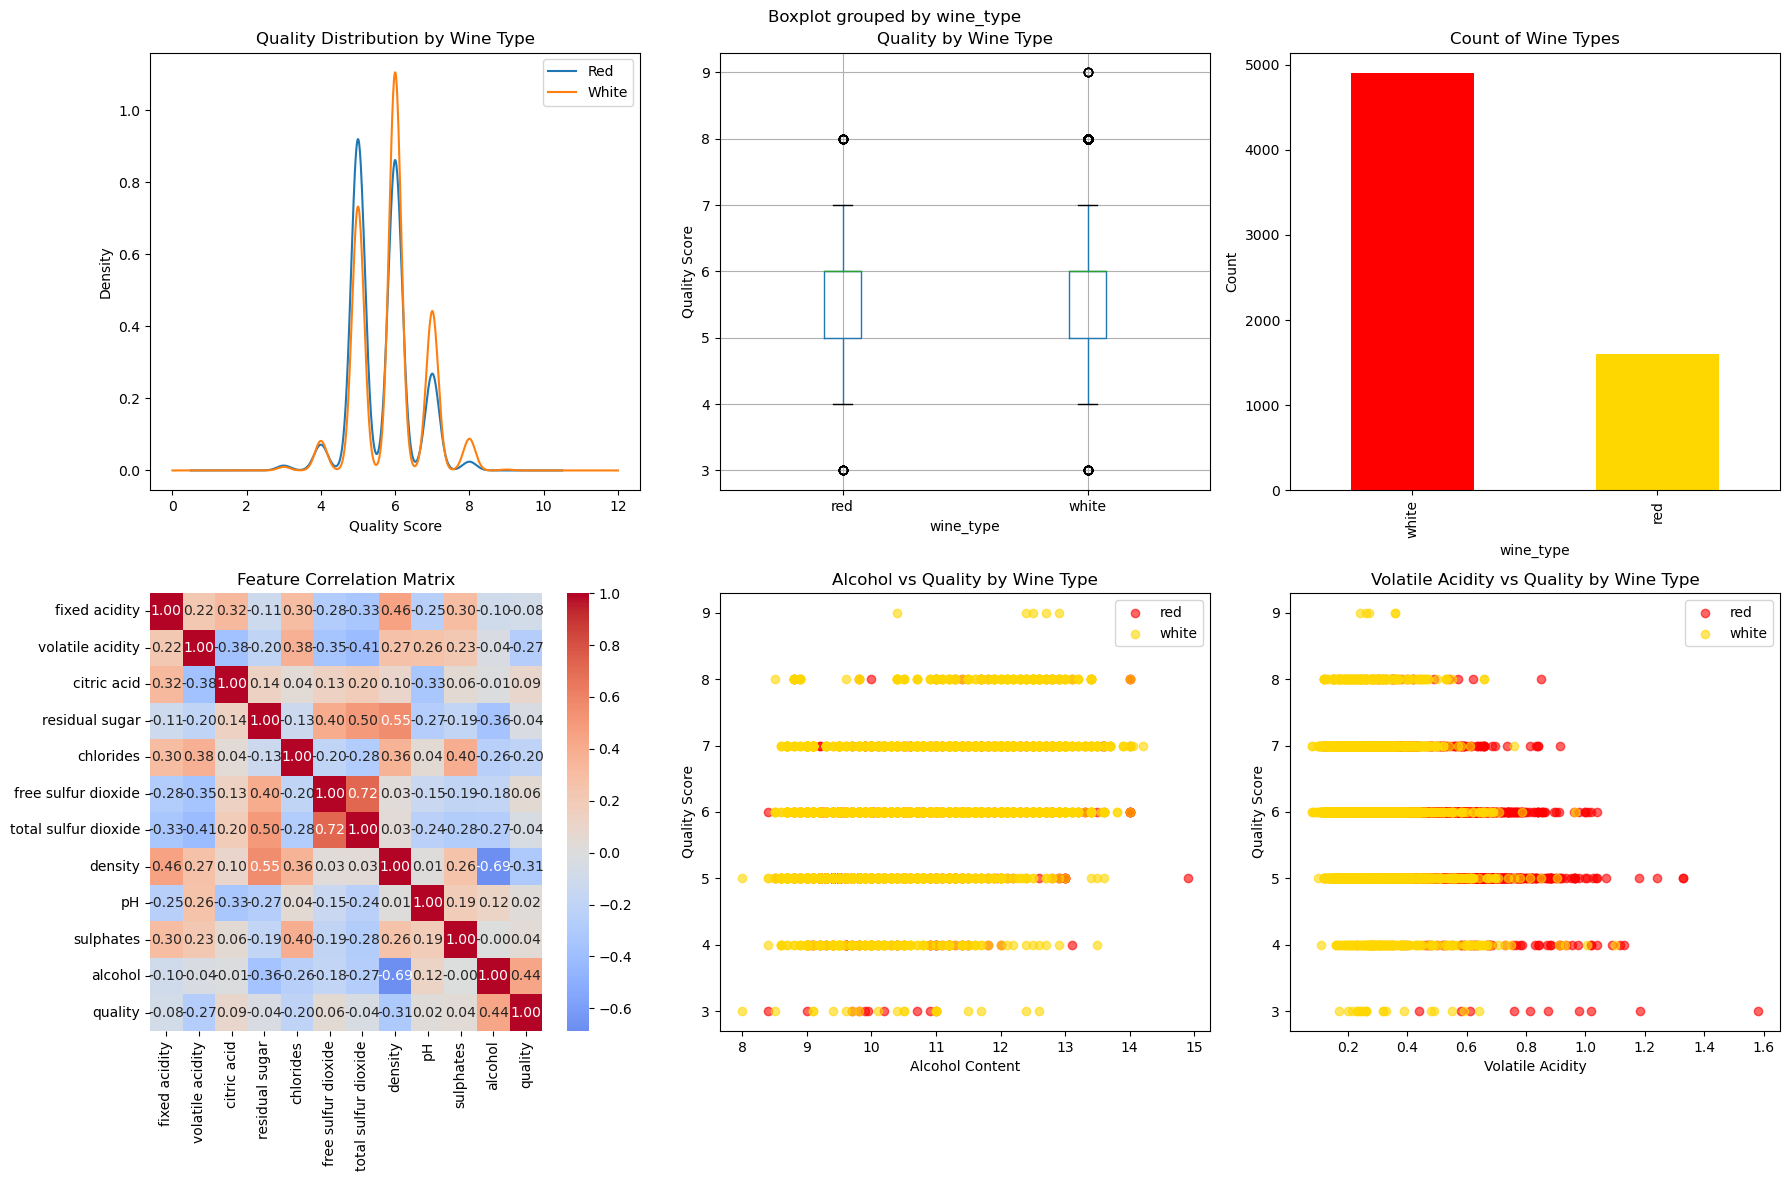

Correlation with Quality:


quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

In [4]:
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

df.groupby('wine_type')['quality'].plot(kind='kde', ax=axes[0,0], legend=True)
axes[0,0].set_xlabel('Quality Score')
axes[0,0].set_ylabel('Density')
axes[0,0].set_title('Quality Distribution by Wine Type')
axes[0,0].legend(['Red', 'White'])

df.boxplot(column='quality', by='wine_type', ax=axes[0,1])
axes[0,1].set_title('Quality by Wine Type')
axes[0,1].set_ylabel('Quality Score')

df['wine_type'].value_counts().plot(kind='bar', ax=axes[0,2], color=['red', 'gold'])
axes[0,2].set_title('Count of Wine Types')
axes[0,2].set_ylabel('Count')

numerical_df = df.drop('wine_type', axis=1)
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,0], fmt='.2f')
axes[1,0].set_title('Feature Correlation Matrix')

colors = {'red': 'red', 'white': 'gold'}
for wine_type in df['wine_type'].unique():
    subset = df[df['wine_type'] == wine_type]
    axes[1,1].scatter(subset['alcohol'], subset['quality'], 
                     alpha=0.6, color=colors[wine_type], label=wine_type)
axes[1,1].set_xlabel('Alcohol Content')
axes[1,1].set_ylabel('Quality Score')
axes[1,1].set_title('Alcohol vs Quality by Wine Type')
axes[1,1].legend()

for wine_type in df['wine_type'].unique():
    subset = df[df['wine_type'] == wine_type]
    axes[1,2].scatter(subset['volatile acidity'], subset['quality'], 
                     alpha=0.6, color=colors[wine_type], label=wine_type)
axes[1,2].set_xlabel('Volatile Acidity')
axes[1,2].set_ylabel('Quality Score')
axes[1,2].set_title('Volatile Acidity vs Quality by Wine Type')
axes[1,2].legend()

plt.tight_layout()
plt.savefig('wine_quality_combined_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Correlation with Quality:")
quality_corr = numerical_df.corr()['quality'].sort_values(ascending=False)
display(quality_corr)

In [5]:
#one-hot encoding
df_processed = pd.get_dummies(df, columns=['wine_type'], prefix='type', drop_first=True)

X = df_processed.drop('quality', axis=1)
y = df_processed['quality']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Feature names:", list(X.columns))

#data split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['wine_type'])
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=df.loc[X_temp.index, 'wine_type'])

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


print("\nWine type distribution in splits:")
for name, dataset in [('Training', X_train), ('Validation', X_val), ('Test', X_test)]:
    if 'type_white' in dataset.columns:
        white_percentage = dataset['type_white'].mean() * 100
        print(f"{name}: {white_percentage:.1f}% white wine, {100-white_percentage:.1f}% red wine")

#standardize with standardscaler
scaler = StandardScaler()


numerical_features = [col for col in X.columns if not col.startswith('type_')]

X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_val_scaled[numerical_features] = scaler.transform(X_val[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

print("\nFeature preprocessing completed!")

Features shape: (6497, 12)
Target shape: (6497,)
Feature names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type_white']
Training set: 3897 samples
Validation set: 1300 samples
Test set: 1300 samples

Wine type distribution in splits:
Training: 75.4% white wine, 24.6% red wine
Validation: 75.4% white wine, 24.6% red wine
Test: 75.4% white wine, 24.6% red wine

Feature preprocessing completed!


In [6]:
linear_reg = LinearRegression()
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

linear_reg.fit(X_train_scaled, y_train)

random_forest.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [8]:
#evaluate models
def evaluate_model(model, X, y, model_name, is_dnn=False):
    if is_dnn:
        y_pred = model.predict(X).flatten()
    else:
        y_pred = model.predict(X)
    
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    return {
        'Model': model_name,
        'MSE': mse,
        'MAE': mae,
        'R²': r2
    }
results = []

lr_results = evaluate_model(linear_reg, X_val_scaled, y_val, "Linear Regression")
results.append(lr_results)

rf_results = evaluate_model(random_forest, X_val_scaled, y_val, "Random Forest")
results.append(rf_results)

results_df = pd.DataFrame(results)
print("Validation Set Results:")
display(results_df.round(4))

Validation Set Results:


,Model,MSE,MAE,R²
0,Linear Regression,0.5199,0.5608,0.3232
1,Random Forest,0.3903,0.4543,0.4919


In [9]:
#evaluation
print("FINAL EVALUATION ON TEST SET")
best_model_name = results_df.loc[results_df['MAE'].idxmin(), 'Model']
print(f"Best model based on validation: {best_model_name}")

# Evaluate all models on test set
test_results = []

if best_model_name == "Linear Regression":
    best_model = linear_reg
    is_dnn = False
elif best_model_name == "Random Forest":
    best_model = random_forest
    is_dnn = False
else:
    best_model = dnn_model
    is_dnn = True

# Test all models
for model, name in [(linear_reg, "Linear Regression"), 
                    (random_forest, "Random Forest")]:
    
    is_dnn_flag = (name == "Deep Neural Network")
    test_result = evaluate_model(model, X_test_scaled, y_test, name, is_dnn=is_dnn_flag)
    test_results.append(test_result)

test_results_df = pd.DataFrame(test_results)
print("\nTest Set Results (Final Evaluation):")
display(test_results_df.round(4))
best_test_result = test_results_df.loc[test_results_df['MAE'].idxmin()]
print(f"   BEST MODEL: {best_test_result['Model']}")
print(f"   Mean Absolute Error: {best_test_result['MAE']:.4f}")
print(f"   R² Score: {best_test_result['R²']:.4f}")

FINAL EVALUATION ON TEST SET
Best model based on validation: Random Forest

Test Set Results (Final Evaluation):


,Model,MSE,MAE,R²
0,Linear Regression,0.5046,0.5451,0.3143
1,Random Forest,0.3599,0.4357,0.5108


   BEST MODEL: Random Forest
   Mean Absolute Error: 0.4357
   R² Score: 0.5108


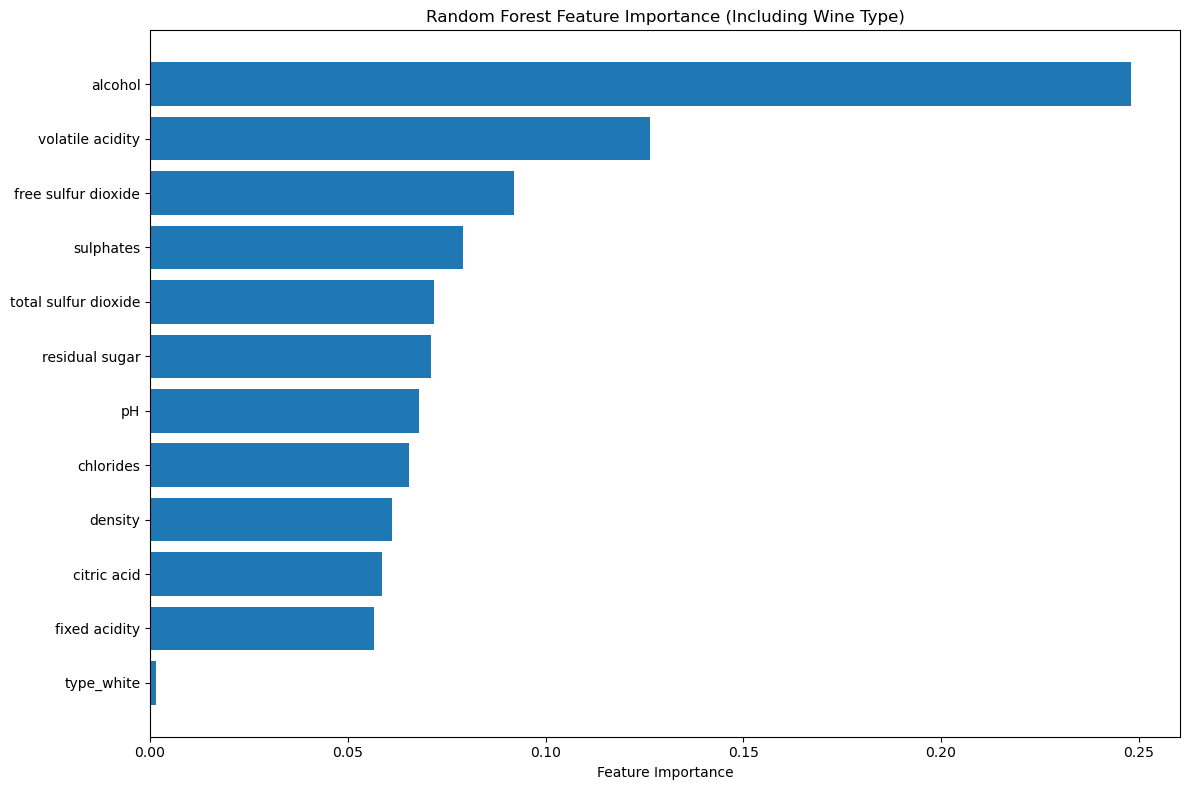

,feature,importance
10,alcohol,0.248026
1,volatile acidity,0.126486
5,free sulfur dioxide,0.091994
9,sulphates,0.079171
6,total sulfur dioxide,0.071898
3,residual sugar,0.071134
8,pH,0.068063
4,chlorides,0.065383
7,density,0.061128
2,citric acid,0.058603


MAE for red wine: 0.4023
MAE for white wine: 0.4466


In [10]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': random_forest.feature_importances_
}).sort_values('importance', ascending=True)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance (Including Wine Type)')
plt.tight_layout()
plt.savefig('random_forest_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

display(feature_importance.sort_values('importance', ascending=False))

X_test_with_type = X_test.copy()
X_test_with_type['actual_quality'] = y_test.values
X_test_with_type['predicted_quality'] = best_model.predict(X_test_scaled)

for wine_type in [0, 1]:  # 0 = red, 1 = white
    type_name = "red" if wine_type == 0 else "white"
    subset = X_test_with_type[X_test_with_type['type_white'] == wine_type]
    mae = mean_absolute_error(subset['actual_quality'], subset['predicted_quality'])
    print(f"MAE for {type_name} wine: {mae:.4f}")

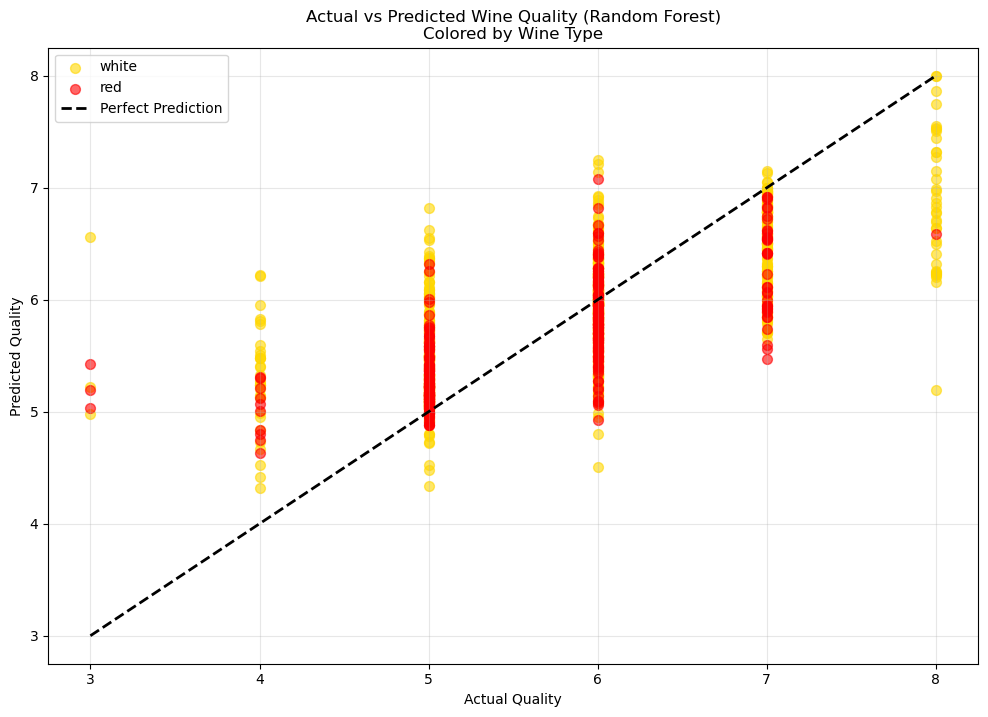

<Figure size 1200x600 with 0 Axes>

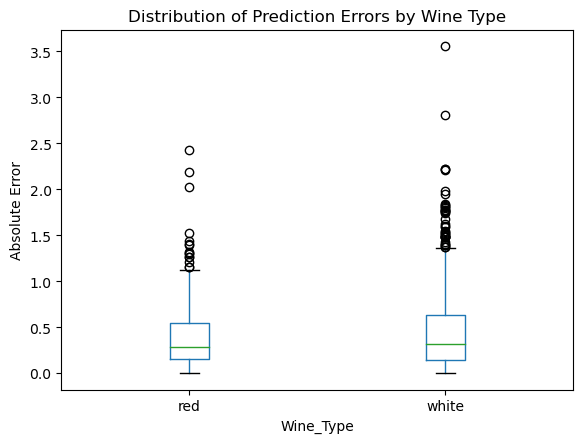

In [11]:
y_pred_best = best_model.predict(X_test_scaled)

comparison_df = pd.DataFrame({
    'Wine_Type': ['red' if x == 0 else 'white' for x in X_test['type_white']],
    'Actual_Quality': y_test.values,
    'Predicted_Quality': y_pred_best,
    'Absolute_Error': np.abs(y_test.values - y_pred_best)
})

plt.figure(figsize=(12, 8))
colors = {'red': 'red', 'white': 'gold'}

for wine_type in comparison_df['Wine_Type'].unique():
    subset = comparison_df[comparison_df['Wine_Type'] == wine_type]
    plt.scatter(subset['Actual_Quality'], subset['Predicted_Quality'], 
               alpha=0.6, color=colors[wine_type], label=wine_type, s=50)

#perfect prediction line
min_qual = comparison_df['Actual_Quality'].min()
max_qual = comparison_df['Actual_Quality'].max()
plt.plot([min_qual, max_qual], [min_qual, max_qual], 'k--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title(f'Actual vs Predicted Wine Quality ({best_model_name})\nColored by Wine Type')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('actual_vs_predicted_random_forest.png', dpi=300, bbox_inches='tight')
plt.show()

#error distribution
plt.figure(figsize=(12, 6))
comparison_df.boxplot(column='Absolute_Error', by='Wine_Type', grid=False)
plt.title('Distribution of Prediction Errors by Wine Type')
plt.suptitle('')
plt.ylabel('Absolute Error')
plt.show()

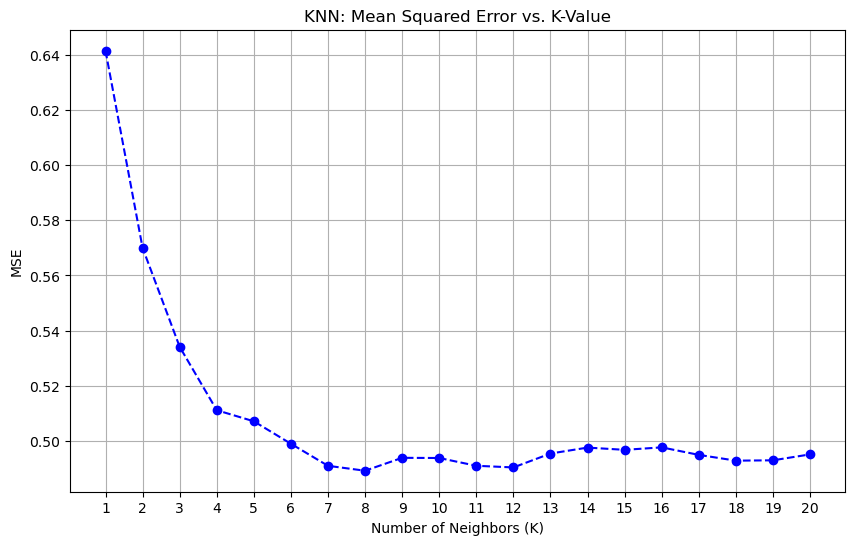

KNeighborsRegressor(n_neighbors=10)

In [12]:
from sklearn.neighbors import KNeighborsRegressor

# Testing different values of K to find the best one
k_values = range(1, 21)
mse_results = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    preds = knn.predict(X_val_scaled)
    mse_results.append(mean_squared_error(y_val, preds))

# Given Plot: K-Value vs. MSE
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_results, marker='o', linestyle='--', color='blue')
plt.title('KNN: Mean Squared Error vs. K-Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('MSE')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Final Model (Example with K=10)
best_knn = KNeighborsRegressor(n_neighbors=10)
best_knn.fit(X_train_scaled, y_train)

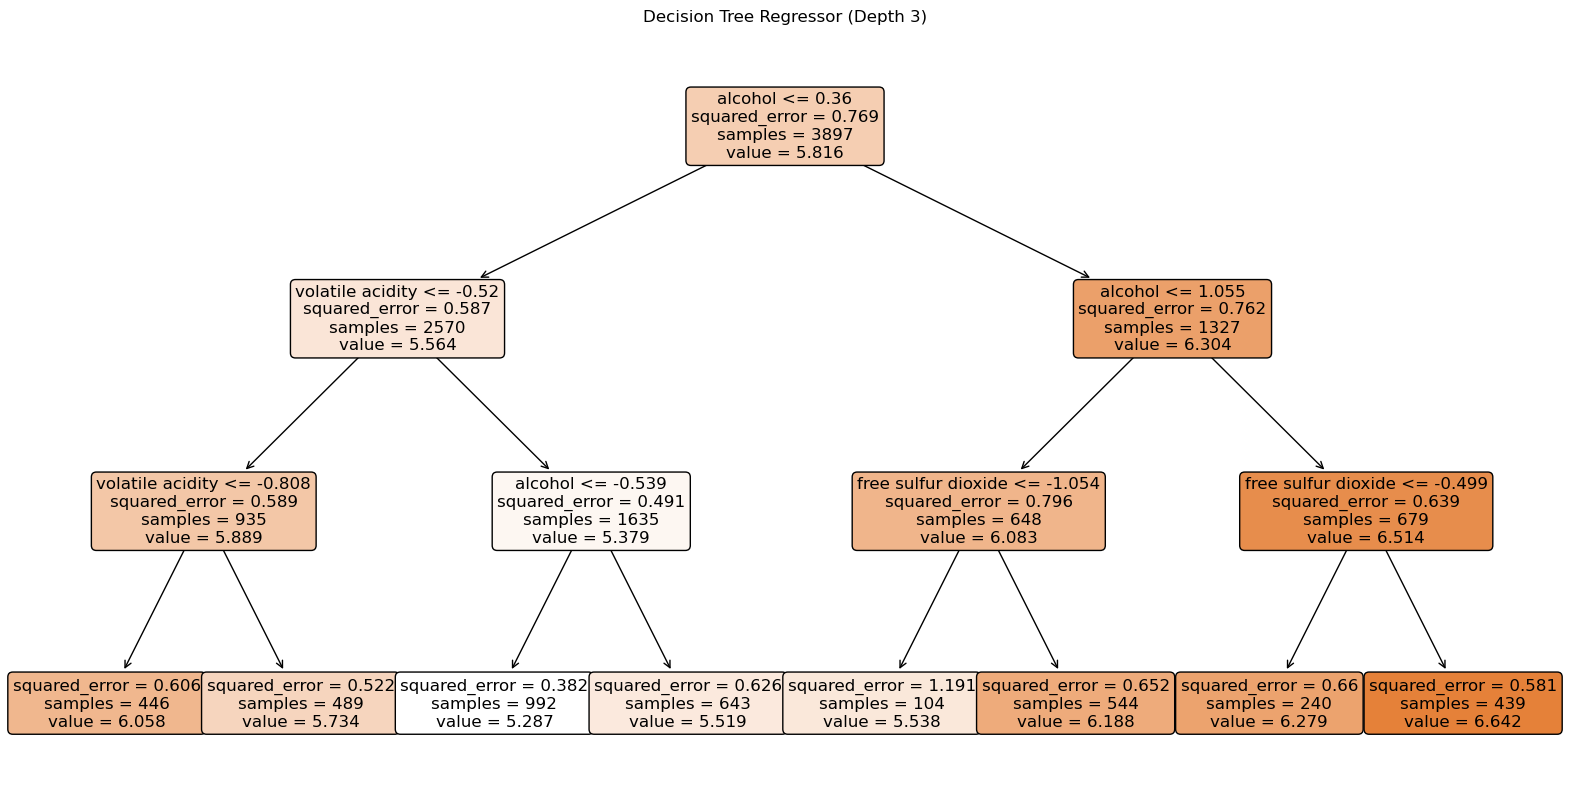

Decision Tree MSE: 0.5628


In [15]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Initialize and train the model
dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Given Plot: Decision Tree Visualization
plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          feature_names=X.columns.tolist(), 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.title('Decision Tree Regressor (Depth 3)')
plt.show()

# Evaluation
dt_preds = dt_model.predict(X_val_scaled)
print(f"Decision Tree MSE: {mean_squared_error(y_val, dt_preds):.4f}")